## 1. Problem Definition and Dataset Identification

### Problem Definition:

Finding a home is like navigating a jungle of open houses, bidding wars, and endless decisions. It's a wild ride! Enter our trusty machine learning model, here to tame the beast of predicting house prices in Ames City, Iowa. By analyzing key features like location, size, and the number of bedrooms, our model can cut through the chaos and provide accurate predictions based on historical data. This isn’t just a fancy tech trick; it’s a game-changer for home buyers in Ames City. With predicted prices at their fingertips, buyers can make informed decisions, avoid overpaying, and ultimately find their dream home without losing their sanity.

### Why Machine Learning?

Machine learning is the ideal choice for predicting house prices because it excels at handling a large number of features and capturing non-linear relationships. Unlike traditional statistical methods, which can struggle with the complex interactions between variables, machine learning models can learn from these intricate patterns. Additionally, they improve over time as more data becomes available, making them increasingly accurate and reliable.

### Dataset Identification:

For this project, we'll use the well-known "House Prices: Advanced Regression Techniques" dataset from Kaggle. The dataset information is gathered from Ames City, Iowa. You can download it from the following location: Kaggle House Prices Dataset.
https://www.kaggle.com/datasets/lespin/house-prices-dataset/data

## 2. Data Exploration, Cleaning, Feature Engineering, and Selection

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle


### Load the dataset

In [319]:
# Load the dataset
data = pd.read_csv('C:/Users/16192/OneDrive/Documents/GitHub/ANA680Final/Data/test.csv')
print(data.shape)
print(data.head(10))

(1459, 81)
     Id    SalePrice  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0  1461  169277.0525          20       RH         80.0    11622   Pave   NaN   
1  1462  187758.3940          20       RL         81.0    14267   Pave   NaN   
2  1463  183583.6836          60       RL         74.0    13830   Pave   NaN   
3  1464  179317.4775          60       RL         78.0     9978   Pave   NaN   
4  1465  150730.0800         120       RL         43.0     5005   Pave   NaN   
5  1466  177150.9892          60       RL         75.0    10000   Pave   NaN   
6  1467  172070.6592          20       RL          NaN     7980   Pave   NaN   
7  1468  175110.9565          60       RL         63.0     8402   Pave   NaN   
8  1469  162011.6988          20       RL         85.0    10176   Pave   NaN   
9  1470  160726.2478          20       RL         70.0     8400   Pave   NaN   

  LotShape LandContour  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0      Reg         Lvl  ...   

In [320]:
# Ensure 'SalePrice' column exists in data
if 'SalePrice' not in data.columns:
    raise ValueError("'SalePrice' column is missing from the data")

In [321]:
# Select relevant features and target variable
features = ['Neighborhood', 'LotArea', 'YearBuilt', 'BldgType', 'CentralAir', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', 'HalfBath']
target = 'SalePrice'

X = data[features]
y = data[target]

In [322]:
# Preprocess features
categorical_features = ['Neighborhood', 'BldgType', 'CentralAir']
numerical_features = ['LotArea', 'YearBuilt', 'GarageCars', 'TotRmsAbvGrd', 'FullBath', 'HalfBath']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [323]:
# Fit the preprocessor on the entire data
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['LotArea', 'YearBuilt', 'GarageCars',
                                  'TotRmsAbvGrd', 'FullBath', 'HalfBath']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Neighborhood', 'BldgType', 'CentralAir'])])

In [324]:
# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [325]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'YearBuilt',
                                                   'GarageCars', 'TotRmsAbvGrd',
                                                   'FullBath', 'HalfBath']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Neighborhood', 'BldgType',
                                                   'CentralAir'])])),
                ('regressor', LinearRegression())])

In [327]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 65925879.547768764


In [328]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [329]:
# Calculate residuals
residuals = y_test - y_pred

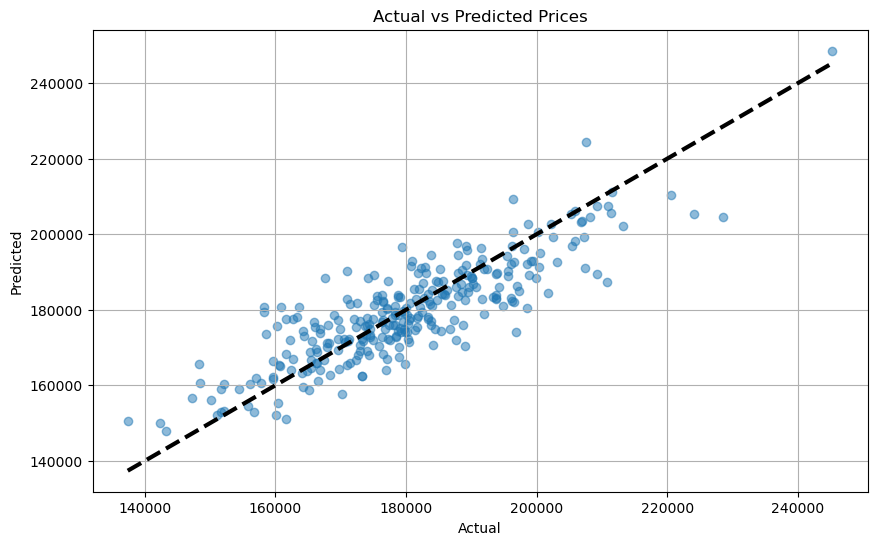

In [330]:
# Scatter Plot of Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')  # Save the figure
plt.show()

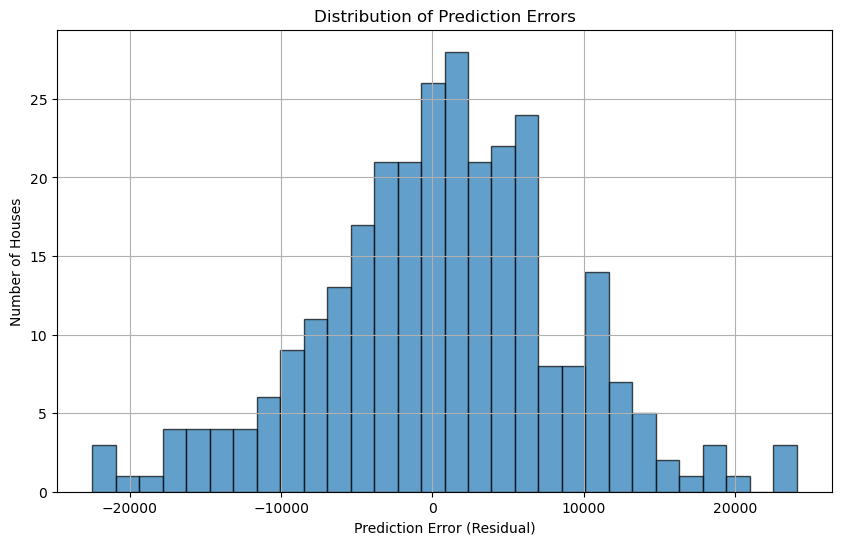

In [331]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error (Residual)')
plt.ylabel('Number of Houses')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.savefig('histogram_of_residuals.png') 
plt.show()

In [332]:
# Print the first few predictions and actual values
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual: 166374.8799, Predicted: 166004.887423992
Actual: 184795.7837, Predicted: 182645.84110253415
Actual: 184199.7882, Predicted: 170796.80320052253
Actual: 156060.8538, Predicted: 160407.94169575354
Actual: 201691.2083, Predicted: 184470.27151624399
Actual: 186920.5126, Predicted: 181214.5555828917
Actual: 191719.1617, Predicted: 193331.31291653903
Actual: 179749.8762, Predicted: 179046.91587402494
Actual: 195560.883, Predicted: 189043.4245483737
Actual: 180085.7669, Predicted: 174043.1010687826


In [333]:
# Save the model to a file
model_path = 'house_price_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)


In [334]:
# Save the preprocessor separately
with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)